#### Traditional Data Analysis process:

1. Define the question 
2. Data Extraction
3. Explore the data (EDA)
4. Clean the data (Data wrangling and Feature Engineering)
4. Data Modeling 
5. Visualize and share the findings

### 1. Question definition

Predict which passengers were transported by an anomaly using records recovered from the spaceship’s damaged computer system.

### 2. Data Extraction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder



In [2]:
df = pd.read_csv("train.csv")

### 3. Explore the Data

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
df.isnull().sum(axis = 0)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
(df.isnull().sum(axis = 0) / df.shape[0]).round(2)

PassengerId     0.00
HomePlanet      0.02
CryoSleep       0.02
Cabin           0.02
Destination     0.02
Age             0.02
VIP             0.02
RoomService     0.02
FoodCourt       0.02
ShoppingMall    0.02
Spa             0.02
VRDeck          0.02
Name            0.02
Transported     0.00
dtype: float64

#### Analysing the passenger ID

 A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always

Idea: Create two columns, one column with the person group using gggg, and another column using "pp" to say how many people went with the person

In [7]:
df["Group"] = df["PassengerId"].str[:4]

In [8]:
df["PassengerId"].shape

(8693,)

In [9]:
len(df["Group"].unique()) # There's 2400 people which are part of a group

6217

In [10]:
df["group"].value_counts() # The highest amount of people within one group is 8 and the lowest 1

KeyError: 'group'

#### Analysing the HomePlanet

 The planet the passenger departed from, typically their planet of permanent residence.

In [ ]:
df["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x308c2fa90>,
 [Text(-0.14445288072599838, 1.0904739177302503, 'Earth'),
  Text(-0.5456478714190157, -0.955127426271436, 'Europa'),
  Text(0.8752009735838736, -0.6663507003356715, 'Mars')],
 [Text(-0.0787924803959991, 0.594803955125591, '54%'),
  Text(-0.29762611168309944, -0.520978596148056, '25%'),
  Text(0.4773823492275674, -0.36346401836491166, '21%')])

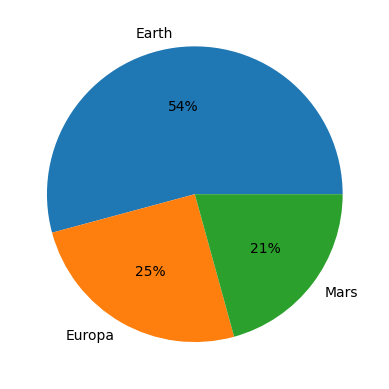

In [ ]:
plt.pie(df["HomePlanet"].value_counts(), labels = df["HomePlanet"].value_counts().index,  autopct='%1.0f%%') 

The most common planet of origin is earth

Ideas: See the correlation between the planet and the transportation

In [ ]:
df['Transported'] = df['Transported'].astype(int)

<Axes: xlabel='Transported', ylabel='Transported'>

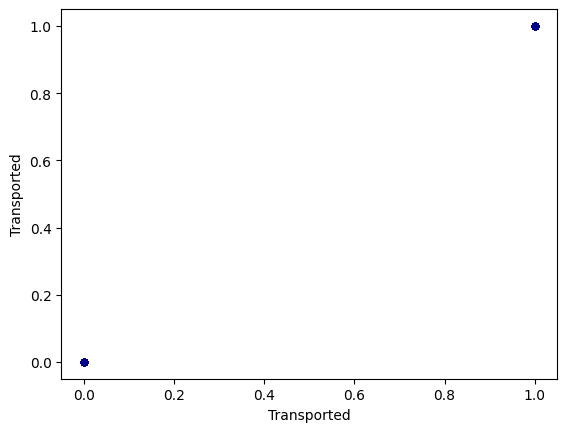

In [ ]:
df.plot.scatter(x='Transported',
                      y='Transported',
                      c='DarkBlue')

In [ ]:
one_hot_homeplanet = pd.get_dummies(df['HomePlanet']).astype(int)
one_hot_homeplanet["Transported"] = df["Transported"]
one_hot_homeplanet.corr()

In [ ]:
one_hot_homeplanet.corr()

,Earth,Europa,Mars,Transported
Earth,1.000000,-0.604411,-0.534195,-0.169019
Europa,-0.604411,1.000000,-0.287022,0.176916
Mars,-0.534195,-0.287022,1.000000,0.019544
Transported,-0.169019,0.176916,0.019544,1.000000


We noticed that people from Earth are less likely to be transported as opposed to people from Europa

#### Analysing the CryoSleep column

Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

In [ ]:
df["CryoSleep"].isna().sum() ## Many missing values

217

In [ ]:
df_no_na_cryo_sleep = df[~df["CryoSleep"].isna()]

In [ ]:
df_no_na_cryo_sleep = df_no_na_cryo_sleep[["Transported", "CryoSleep"]]

In [ ]:
df_no_na_cryo_sleep["CryoSleep"] = df_no_na_cryo_sleep["CryoSleep"].astype(int)

In [ ]:
df_no_na_cryo_sleep

,Transported,CryoSleep
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
8688,0,0
8689,0,1
8690,1,0
8691,0,0


In [ ]:
df_no_na_cryo_sleep.corr()

,Transported,CryoSleep
Transported,1.000000,0.468645
CryoSleep,0.468645,1.000000


A very strong correlation between being in a cryosleep and being transported

#### Analysing the Cabin column

The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [ ]:
df['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

#### Analysing the Destination column

The planet the passenger will be debarking to.

In [ ]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

([<matplotlib.patches.Wedge at 0x308c46550>,
 [Text(-0.6324575589537547, 0.8999985756223495, 'TRAPPIST-1e'),
  Text(0.34470342064144743, -1.0445954010037022, '55 Cancri e'),
  Text(1.0528587716222633, -0.3185724517563615, 'PSO J318.5-22')],
 [Text(-0.34497685033841163, 0.4909083139758269, '69%'),
  Text(0.18802004762260766, -0.569779309638383, '21%'),
  Text(0.5742866027030525, -0.17376679186710628, '9%')])

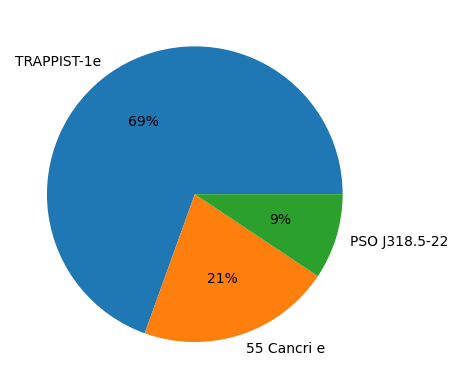

In [ ]:
plt.pie(df["Destination"].value_counts(), labels = df["Destination"].value_counts().index,  autopct='%1.0f%%') 

In [ ]:
df2 = df.copy()[["Destination", "Transported"]]
one_hot = pd.get_dummies(df2['Destination']).astype(int)

In [ ]:
one_hot["Transported"] = df2["Transported"]

<Axes: >

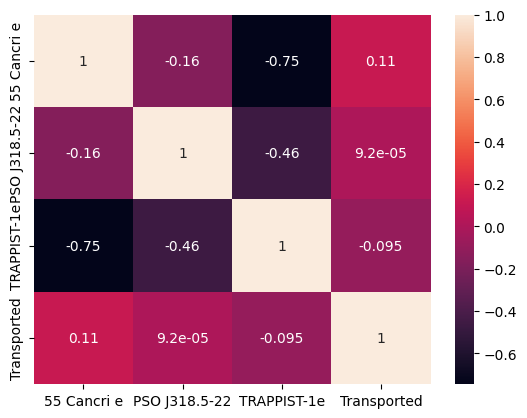

In [ ]:
sns.heatmap(one_hot.corr(), annot=True)

The correlation isn't high but it's still there

#### Analysing the Age column 

(array([ 591.,  649., 2089., 1976., 1350.,  893.,  536.,  294.,  106.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

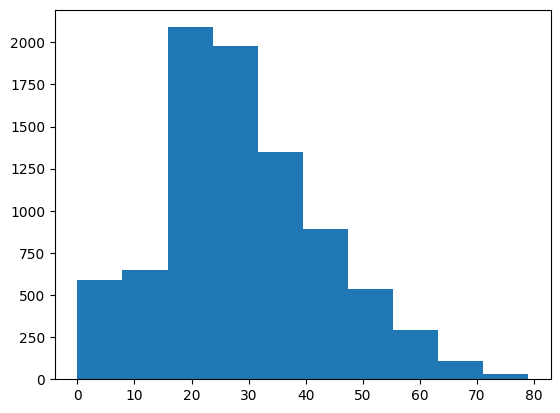

In [ ]:
plt.hist(df["Age"])

#### Analysing the VIP Column

Whether the passenger has paid for special VIP service during the voyage.

In [ ]:
df_vip = df["VIP"].value_counts().reset_index()

In [ ]:
df_vip

,VIP,count
0,False,8291
1,True,199


<BarContainer object of 2 artists>

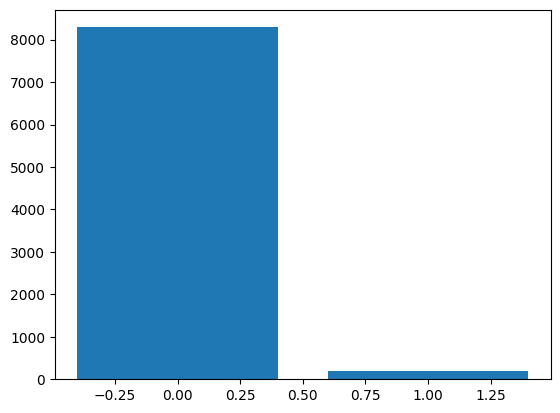

In [ ]:
plt.bar(df_vip["VIP"], df_vip["count"])

In [ ]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Group'],
      dtype='object')

#### Analysing the Room Service, FoodCourt, ShoppingMall, Spa, VR Deck

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

<Axes: xlabel='RoomService', ylabel='FoodCourt'>

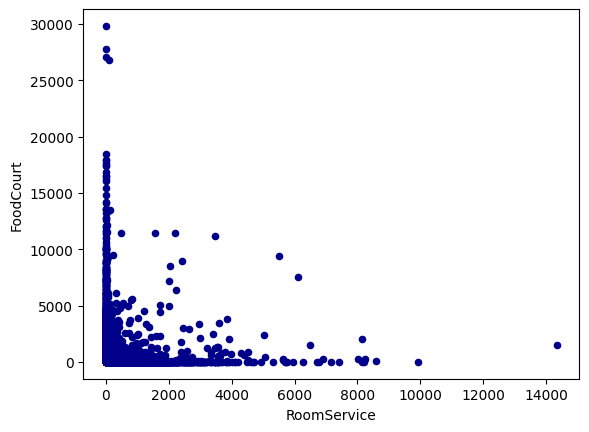

In [ ]:
df.plot.scatter(x='RoomService',
                      y='FoodCourt',
                      c='DarkBlue')

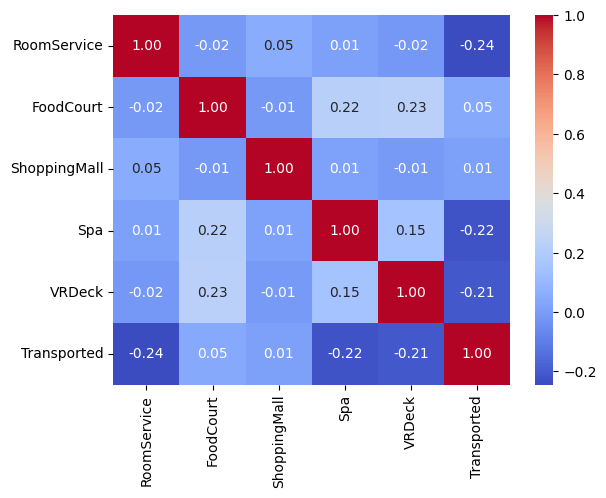

In [11]:
subset_df = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Display the plot
plt.show()

There's some correlation between each variables and the target variable

### 4. Data cleaning, Feature Engineering

In [12]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004


#### cleaning PassengerId

 A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always

Create two columns: 
- group column: already done
- number of relatives column

In [13]:
group_series = df['Group'].value_counts()

In [14]:
def fnc(group_num):
    """
    Given a group ID, this function counts how many other passengers share the same group ID and returns that count.

    Parameters:
    group_num (int): The group ID for which the count of passengers is to be determined.

    Returns:
    int: The number of passengers sharing the same group ID.
    """
    return group_series.loc[group_num]

df['Nb_relatives'] = df['Group'].apply(fnc)
df['Nb_relatives']

0       1
1       1
2       2
3       2
4       1
       ..
8688    1
8689    1
8690    1
8691    2
8692    2
Name: Nb_relatives, Length: 8693, dtype: int64

In [15]:
df[['Nb_relatives', 'Transported']].corr() #There's a slight correlation

,Nb_relatives,Transported
Nb_relatives,1.000000,0.082644
Transported,0.082644,1.000000


In [16]:
df_relative = df.groupby('Nb_relatives')['Transported'].mean().reset_index()

In [17]:
df_relative

,Nb_relatives,Transported
0,1,0.452445
1,2,0.538050
2,3,0.593137
3,4,0.640777
4,5,0.592453
5,6,0.614943
6,7,0.541126
7,8,0.394231


<Axes: xlabel='Nb_relatives', ylabel='Transported'>

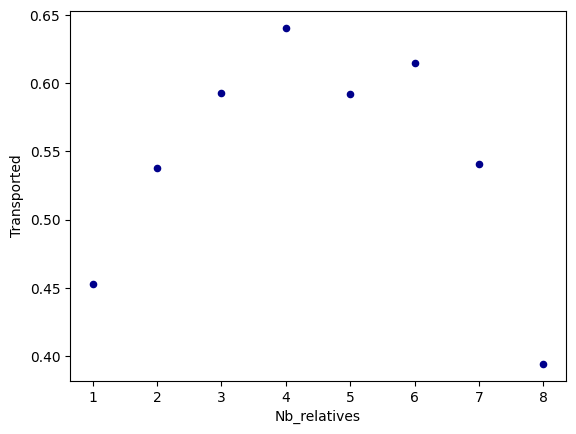

In [18]:
df_relative.plot.scatter(x='Nb_relatives',
                      y='Transported',
                      c='DarkBlue')

#### cleaning HomePlanet

 The planet the passenger departed from, typically their planet of permanent residence.

In [19]:
df.isnull().sum(axis = 0) # There are 201 missing values

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Group             0
Nb_relatives      0
dtype: int64

In [20]:
df['HomePlanet'] = df['HomePlanet'].fillna("Unknown") #Replace NA with unknown

In [21]:
df.isnull().sum(axis = 0) # There are 201 missing values

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Group             0
Nb_relatives      0
dtype: int64

In [22]:
one_hot_homeplanet = pd.get_dummies(df['HomePlanet']).astype(int)
one_hot_homeplanet["Transported"] = df["Transported"]
one_hot_homeplanet.corr() ## Unknown planets have a very small correlation with Transported

,Earth,Europa,Mars,Unknown,Transported
Earth,1.000000,-0.604411,-0.534195,-0.163174,-0.169019
Europa,-0.604411,1.000000,-0.287022,-0.087673,0.176916
Mars,-0.534195,-0.287022,1.000000,-0.077488,0.019544
Unknown,-0.163174,-0.087673,-0.077488,1.000000,0.002712
Transported,-0.169019,0.176916,0.019544,0.002712,1.000000


In [23]:
encoder = OneHotEncoder()
column_name = 'HomePlanet'
encoded_df = encoder.fit_transform(df[[column_name]]).toarray()
encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out([column_name]))
df = pd.concat([df, encoded_df], axis=1)
df.drop(column_name, axis=1, inplace=True)


In [24]:
df

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Nb_relatives,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,0.0,1.0,0.0,0.0
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,1.0,0.0,0.0,0.0
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,0.0,1.0,0.0,0.0
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,0.0,1.0,0.0,0.0
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,1,0.0,1.0,0.0,0.0
8689,9278_01,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,1,1.0,0.0,0.0,0.0
8690,9279_01,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,1,1.0,0.0,0.0,0.0
8691,9280_01,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,2,0.0,1.0,0.0,0.0


#### cleaning CryoSleep 

Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

In [25]:
df['CryoSleep'] = df['CryoSleep'].fillna(2)
df['CryoSleep']  = df['CryoSleep'].astype(int)

In [26]:
one_hot_cryosleep = pd.get_dummies(df['CryoSleep'])
one_hot_cryosleep["Transported"] = df["Transported"]
one_hot_cryosleep.corr() # Since the correlation is different between the missing values (2) and the one that had we will keep the missing value as 2

,0,1,2,Transported
0,1.000000,-0.947367,-0.206864,-0.451744
1,-0.947367,1.000000,-0.117247,0.460132
2,-0.206864,-0.117247,1.000000,-0.004846
Transported,-0.451744,0.460132,-0.004846,1.000000


In [27]:
pd.get_dummies(df['CryoSleep'])

,0,1,2
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
8688,True,False,False
8689,False,True,False
8690,True,False,False
8691,True,False,False


In [28]:
encoder = OneHotEncoder()
column_name = 'CryoSleep'
encoded_df = encoder.fit_transform(df[[column_name]]).toarray()
encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out([column_name]))
df = pd.concat([df, encoded_df], axis=1)
df.drop(column_name, axis=1, inplace=True)



In [29]:
df

,PassengerId,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Transported,Group,Nb_relatives,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,CryoSleep_0,CryoSleep_1,CryoSleep_2
0,0001_01,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,False,0001,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0002_01,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,True,0002,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0003_01,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,False,0003,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0003_02,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,False,0003,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0004_01,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,True,0004,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,...,False,9276,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8689,9278_01,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,...,False,9278,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8690,9279_01,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,...,True,9279,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8691,9280_01,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,...,False,9280,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### cleaning Cabin 

The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [32]:
df['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [39]:
df['Deck'] = df['Cabin'].str[0]
df['Num'] = df['Cabin'].str[2]
df['Side'] = df['Cabin'].str[-1]

In [52]:
df['Deck'] = df['Deck'].fillna('Unknown_Deck')
df['Num'] = df['Num'].fillna('Unknown_Num')
df['Side'] = df['Side'].fillna('Unknown_Side')

KeyError: 'Deck'

In [53]:
encoder = OneHotEncoder()

def encode_column(column_name, df):
    encoded_df = encoder.fit_transform(df[[column_name]]).toarray()
    encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out([column_name]))
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(column_name, axis=1, inplace=True)
    return df

df = encode_column('Deck', df)

In [54]:
df = encode_column('Num', df)
df = encode_column('Side', df)

In [58]:
df = df.drop('Cabin', axis = 1)

In [59]:
df

,PassengerId,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Num_4,Num_5,Num_6,Num_7,Num_8,Num_9,Num_Unknown_Num,Side_P,Side_S,Side_Unknown_Side
0,0001_01,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0002_01,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0003_01,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0003_02,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0004_01,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8689,9278_01,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8690,9279_01,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8691,9280_01,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### cleaning Destination 

The planet the passenger will be debarking to.

In [63]:
df['Destination'] = df['Destination'].fillna("Unknown_Destination")

In [65]:
one_hot = pd.get_dummies(df['Destination'])
one_hot["Transported"] = df["Transported"]
one_hot.corr() # It has a different correlation pattern than the other columns so we will keep it like this

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Unknown_Destination,Transported
55 Cancri e,1.000000,-0.162240,-0.745664,-0.074727,0.108722
PSO J318.5-22,-0.162240,1.000000,-0.463273,-0.046427,0.000092
TRAPPIST-1e,-0.745664,-0.463273,1.000000,-0.213381,-0.094700
Unknown_Destination,-0.074727,-0.046427,-0.213381,1.000000,0.000547
Transported,0.108722,0.000092,-0.094700,0.000547,1.000000


In [66]:
df = encode_column('Destination', df)

#### cleaning Age 

In [76]:
df['Age'].isnull().sum(axis = 0) # There are 201 missing values

0

In [74]:
mean_age = df['Age'].mean().astype(int)

In [75]:
df['Age'] = df['Age'].fillna(mean_age)

In [77]:
df['Age'].isnull().sum(axis = 0) # There are 201 missing values

0

#### cleaning VIP 

Whether the passenger has paid for special VIP service during the voyage.

In [81]:
df['VIP'].isnull().sum()

203

In [85]:
df['VIP'] = df['VIP'].fillna(2)

In [87]:
df['VIP'] = df['VIP'].astype(int)

In [89]:
df['VIP'].unique()

array([0, 1, 2])

In [90]:
one_hot_cryosleep = pd.get_dummies(df['VIP'])
one_hot_cryosleep["Transported"] = df["Transported"]
one_hot_cryosleep.corr() # Since the correlation is different between the missing values (2) and the one that had we will keep the missing value as 2

,0,1,2,Transported
0,1.000000,-0.695122,-0.702238,0.024602
1,-0.695122,1.000000,-0.023668,-0.037261
2,-0.702238,-0.023668,1.000000,0.002688
Transported,0.024602,-0.037261,0.002688,1.000000


In [91]:
df = encode_column('VIP', df)

In [92]:
df

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,...,Side_P,Side_S,Side_Unknown_Side,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown_Destination,VIP_0,VIP_1,VIP_2
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8689,9278_01,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8690,9279_01,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8691,9280_01,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Cleaning RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [95]:
df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].isnull().sum()

RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [101]:
mean_df = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean()
mean_df.loc['RoomService']

224.687617481203

In [103]:
df['RoomService'].fillna(mean_df.loc['RoomService'], inplace=True)
df['FoodCourt'].fillna(mean_df.loc['FoodCourt'], inplace=True)
df['ShoppingMall'].fillna(mean_df.loc['ShoppingMall'], inplace=True)
df['Spa'].fillna(mean_df.loc['Spa'], inplace=True)
df['VRDeck'].fillna(mean_df.loc['VRDeck'], inplace=True)

/var/folders/5w/0rbr_3m55zvcks3pv8gm43s40000gn/T/ipykernel_3150/1630190577.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RoomService'].fillna(mean_df.loc['RoomService'], inplace=True)
/var/folders/5w/0rbr_3m55zvcks3pv8gm43s40000gn/T/ipykernel_3150/1630190577.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [105]:
df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].isnull().sum()

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

#### Cleaning Name

In [108]:
df = df.drop('Name', axis=1)

#### Cleaning Transported

In [111]:
df['Transported'] = df['Transported'].astype(int)

In [114]:
df.isnull().sum().sum()

0

In [118]:
df = encode_column('Group', df)

In [127]:
df = df.set_index('PassengerId')

### 5. Data Modeling